In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/baseball-savant-leaderboards-2024/bat_tracking_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_stance_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/pitch_movement_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_throwing_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/pitcher_arm_angle_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/running_game_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/arm_strength_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/home_runs_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/basestealing_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/timer_infractions_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/baserunning_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/batted_ball_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_blocking_2024_2025.csv
/kaggle/

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/baseball-savant-leaderboards-2024/bat_tracking_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_stance_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/pitch_movement_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_throwing_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/pitcher_arm_angle_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/running_game_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/arm_strength_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/home_runs_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/basestealing_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/timer_infractions_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/baserunning_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/batted_ball_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_blocking_2024_2025.csv
/kaggle/

In [12]:
pitch_movement = pd.read_csv('/kaggle/input/baseball-savant-leaderboards-2024/pitch_movement_2024_2025.csv')

In [13]:
query1 = """
SELECT 
    "last_name, first_name" AS pitcher,
    team_name,
    pitch_hand,
    avg_speed,
    diff_z AS vertical_movement_vs_avg,
    diff_x AS horizontal_movement_vs_avg,
    pitches_thrown,
    CASE 
        WHEN avg_speed >= 95 THEN 'Elite Velocity'
        WHEN avg_speed >= 92 THEN 'Above Average'
        WHEN avg_speed >= 89 THEN 'Average'
        ELSE 'Below Average'
    END AS velocity_tier
FROM pitch_movement
WHERE year = 2024
    AND pitches_thrown >= 100
ORDER BY avg_speed DESC
"""

result1 = ps.sqldf(query1, locals())
print("=== FASTBALL VELOCITY TIERS WITH MOVEMENT ===")
print(result1.head(20).to_string())

=== FASTBALL VELOCITY TIERS WITH MOVEMENT ===
              pitcher  team_name pitch_hand  avg_speed  vertical_movement_vs_avg  horizontal_movement_vs_avg  pitches_thrown   velocity_tier
0          Joyce, Ben     Angels          R      102.1                      -0.4                         1.1             246  Elite Velocity
1       Miller, Mason  Athletics          R      100.9                       0.9                         1.0             646  Elite Velocity
2        Duran, Jhoan      Twins          R      100.5                      -2.8                         3.4             359  Elite Velocity
3    Martinez, Justin    D-backs          R      100.5                      -1.8                         0.5             139  Elite Velocity
4       Helsley, Ryan  Cardinals          R       99.6                       1.8                        -4.8             423  Elite Velocity
5      Suarez, Robert     Padres          R       99.1                       1.8                        -0.3

In [14]:
query2 = """
SELECT
    velocity_tier,
    COUNT(*) AS num_pitchers,
    ROUND(AVG(avg_speed), 2) AS avg_velocity,
    ROUND(AVG(vertical_movement_vs_avg), 3) AS avg_vertical_movement,
    ROUND(AVG(horizontal_movement_vs_avg), 3) AS avg_horizontal_movement
FROM (
    SELECT 
        avg_speed,
        diff_z AS vertical_movement_vs_avg,
        diff_x AS horizontal_movement_vs_avg,
        CASE 
            WHEN avg_speed >= 95 THEN 'Elite Velocity'
            WHEN avg_speed >= 92 THEN 'Above Average'
            WHEN avg_speed >= 89 THEN 'Average'
            ELSE 'Below Average'
        END AS velocity_tier
    FROM pitch_movement
    WHERE year = 2024
    AND pitches_thrown >= 100
)
GROUP BY velocity_tier
ORDER BY avg_velocity DESC
"""

result2 = ps.sqldf(query2, locals())
print("=== MOVEMENT BY VELOCITY TIER ===")
print(result2.to_string())

=== MOVEMENT BY VELOCITY TIER ===
    velocity_tier  num_pitchers  avg_velocity  avg_vertical_movement  avg_horizontal_movement
0  Elite Velocity           149         96.51                  0.060                    0.150
1   Above Average           187         93.58                 -0.383                    0.034
2         Average            53         91.01                 -0.649                   -0.511
3   Below Average             5         87.56                 -2.480                    0.320


In [15]:
query3 = """
SELECT 
    "last_name, first_name" AS pitcher,
    team_name,
    avg_speed,
    diff_z AS vertical_movement_vs_avg,
    diff_x AS horizontal_movement_vs_avg,
    pitches_thrown
FROM pitch_movement
WHERE year = 2024
    AND pitches_thrown >= 100
ORDER BY diff_z DESC
LIMIT 10
"""

result3 = ps.sqldf(query3, locals())
print("=== TOP 10 PITCHERS BY VERTICAL MOVEMENT ABOVE AVERAGE ===")
print(result3.to_string())

=== TOP 10 PITCHERS BY VERTICAL MOVEMENT ABOVE AVERAGE ===
             pitcher team_name  avg_speed  vertical_movement_vs_avg  horizontal_movement_vs_avg  pitches_thrown
0        Vesia, Alex   Dodgers       93.4                       4.2                        -1.1             700
1  Estrada, Jeremiah    Padres       97.2                       3.4                        -6.0             566
2   Javier, Cristian    Astros       91.7                       3.3                        -1.5             224
3       Pepiot, Ryan      Rays       94.9                       3.1                         1.7            1084
4   Crawford, Kutter   Red Sox       92.6                       3.1                         0.5             952
5      Knack, Landon   Dodgers       93.5                       3.1                        -0.3             532
6       Matsui, Yuki    Padres       92.2                       3.1                        -2.9             430
7      Myers, Tobias   Brewers       92.9    

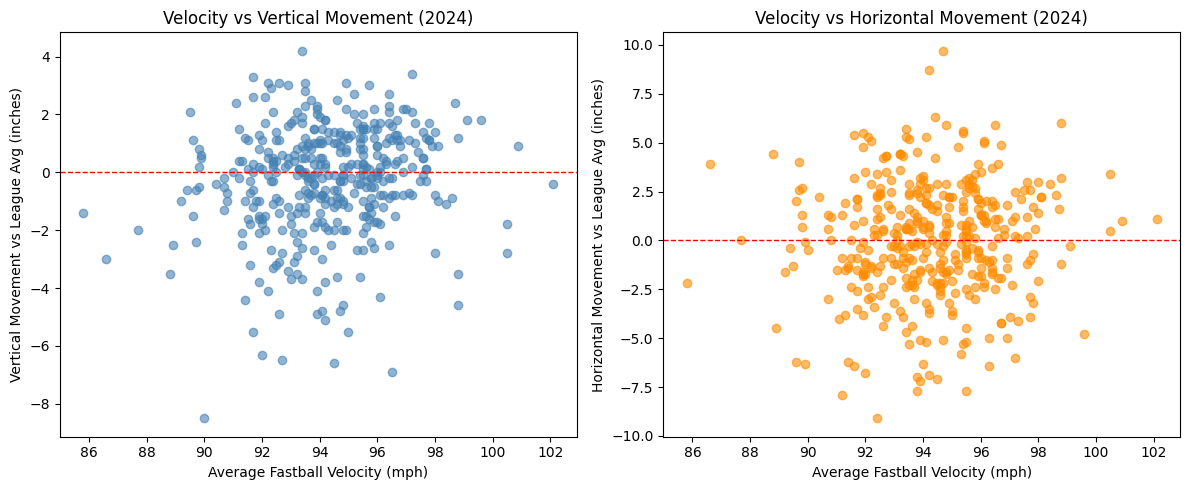

Chart saved.


In [16]:
df_2024 = pitch_movement[(pitch_movement['year'] == 2024) & (pitch_movement['pitches_thrown'] >= 100)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df_2024['avg_speed'], df_2024['diff_z'], alpha=0.6, color='steelblue')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_xlabel('Average Fastball Velocity (mph)')
axes[0].set_ylabel('Vertical Movement vs League Avg (inches)')
axes[0].set_title('Velocity vs Vertical Movement (2024)')

axes[1].scatter(df_2024['avg_speed'], df_2024['diff_x'], alpha=0.6, color='darkorange')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_xlabel('Average Fastball Velocity (mph)')
axes[1].set_ylabel('Horizontal Movement vs League Avg (inches)')
axes[1].set_title('Velocity vs Horizontal Movement (2024)')

plt.tight_layout()
plt.savefig('pitching_analysis.png')
plt.show()
print("Chart saved.")

In [17]:
print(result2.to_string())

    velocity_tier  num_pitchers  avg_velocity  avg_vertical_movement  avg_horizontal_movement
0  Elite Velocity           149         96.51                  0.060                    0.150
1   Above Average           187         93.58                 -0.383                    0.034
2         Average            53         91.01                 -0.649                   -0.511
3   Below Average             5         87.56                 -2.480                    0.320
